In [59]:
import pandas as pd
import numpy as np
import datetime, warnings, scipy
import seaborn as sns
import matplotlib as mpl

In [60]:
df1 = pd.read_csv(filepath_or_buffer = '../data/2008.csv')
# df2 = pd.read_csv(filepath_or_buffer = '../data/2007.csv')
# df3 = pd.read_csv(filepath_or_buffer = '../data/Jan-2016.csv')

### CRSDepTime is Scheduled Departure Time

In [10]:
df1['ArrDelay'] = df1['ArrDelay'] >= 15

In [11]:
df1['ArrDelay']

0          False
1          False
2          False
3          False
4           True
5          False
6           True
7          False
8          False
9          False
10         False
11          True
12         False
13         False
14         False
15         False
16          True
17         False
18          True
19          True
20         False
21          True
22         False
23         False
24         False
25         False
26          True
27         False
28         False
29         False
           ...  
7009698    False
7009699     True
7009700    False
7009701     True
7009702    False
7009703    False
7009704    False
7009705     True
7009706    False
7009707    False
7009708    False
7009709     True
7009710     True
7009711    False
7009712    False
7009713    False
7009714    False
7009715     True
7009716    False
7009717     True
7009718     True
7009719     True
7009720    False
7009721     True
7009722    False
7009723    False
7009724    False
7009725    Fal

In [52]:
#Convert the HHMM format to HH:MM format
def format_hour(hm):
    if pd.isnull(hm):
        return np.nan
    else:
        if hm == 2400: hm = 0
        hm = "{0:04d}".format(int(hm))
        newHM = datetime.time(int(hm[0:2]), int(hm[2:4]))
        return newHM

In [53]:
df1['CRSDepTime_Formatted'] = df1['CRSDepTime'].apply(format_hour)

In [54]:
df1['CRSDepTime_Formatted']

0          19:55:00
1          07:35:00
2          06:20:00
3          09:30:00
4          17:55:00
5          19:15:00
6          18:30:00
7          10:40:00
8          06:15:00
9          16:20:00
10         07:00:00
11         15:10:00
12         14:30:00
13         07:15:00
14         17:00:00
15         10:20:00
16         14:25:00
17         07:45:00
18         12:55:00
19         13:25:00
20         07:05:00
21         16:25:00
22         18:40:00
23         10:30:00
24         08:00:00
25         14:55:00
26         12:55:00
27         19:25:00
28         06:35:00
29         07:30:00
             ...   
7009698    16:35:00
7009699    12:21:00
7009700    18:45:00
7009701    15:00:00
7009702    15:22:00
7009703    19:10:00
7009704    14:45:00
7009705    08:30:00
7009706    14:40:00
7009707    17:55:00
7009708    07:10:00
7009709    15:20:00
7009710    12:20:00
7009711    10:41:00
7009712    08:43:00
7009713    08:15:00
7009714    05:45:00
7009715    08:50:00
7009716    09:36:00


### Apply the same format for Scheduled Arrival Time, Departure Time, Arrival Time

In [55]:
df1['CRSArrTime_Formatted'] = df1['CRSArrTime'].apply(format_hour)
df1['CRSArrTime_Formatted']

0          22:25:00
1          10:00:00
2          07:50:00
3          11:00:00
4          19:25:00
5          21:10:00
6          19:40:00
7          11:50:00
8          06:50:00
9          16:55:00
10         09:15:00
11         17:25:00
12         14:25:00
13         07:10:00
14         16:55:00
15         10:10:00
16         16:25:00
17         09:55:00
18         15:10:00
19         14:35:00
20         08:10:00
21         17:35:00
22         19:50:00
23         11:40:00
24         09:10:00
25         16:05:00
26         16:10:00
27         22:35:00
28         09:45:00
29         10:20:00
             ...   
7009698    17:58:00
7009699    13:59:00
7009700    20:06:00
7009701    16:42:00
7009702    18:23:00
7009703    20:16:00
7009704    16:22:00
7009705    10:08:00
7009706    17:04:00
7009707    20:15:00
7009708    08:37:00
7009709    17:18:00
7009710    15:52:00
7009711    13:03:00
7009712    10:21:00
7009713    15:26:00
7009714    06:50:00
7009715    10:05:00
7009716    11:19:00


### DepTime and ArrTime is the real Departure Time and Arrival Time

In [56]:
df1['DepTime_Formatted'] = df1['DepTime'].apply(format_hour)

In [57]:
df1['ArrTime_Formatted'] = df1['ArrTime'].apply(format_hour)

## Putting Scheduled Departure Time, Scheduled Arrival Time, Departure Time and Arrival Time togerther

In [4]:
#df1.loc[:, ['CRSDepTime_Formatted', 'CRSArrTime_Formatted', 'DepTime_Formatted', 'ArrTime_Formatted']]

### Combine DayOfMonth, Month, Year

In [59]:
df1['Day'] = df1['DayofMonth']

In [60]:
df1['DepDate'] = pd.to_datetime(df1[['Year','Month', 'Day']])

In [61]:
def date_time_combine(r):
    if pd.isnull(r[0]) or pd.isnull(r[1]):
        return np.nan
    else:
        return datetime.datetime.combine(r[0], r[1])
def create_scheduled_dep_time(df, col):
    dt = []
    for index, cols in df1[['DepDate', col]].iterrows():
        if pd.isnull(cols[1]):
            dt.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days = 1)
            cols[1] = datetime.time(0,0)
            dt.append(date_time_combine(cols))
        else:
            cols[1] = format_hour(cols[1])
            dt.append(date_time_combine(cols))
    return pd.Series(dt)

### Combine the scheduled departure time and departure date

In [62]:
df1['CRSDep_Date_Time'] = create_scheduled_dep_time(df1, 'CRSDepTime')

### CRSDep_Date_Time
This feature shows the **scheduled departure time** in the format of Date and Time 

In [63]:
df1['CRSDep_Date_Time']

0         2008-01-03 19:55:00
1         2008-01-03 07:35:00
2         2008-01-03 06:20:00
3         2008-01-03 09:30:00
4         2008-01-03 17:55:00
5         2008-01-03 19:15:00
6         2008-01-03 18:30:00
7         2008-01-03 10:40:00
8         2008-01-03 06:15:00
9         2008-01-03 16:20:00
10        2008-01-03 07:00:00
11        2008-01-03 15:10:00
12        2008-01-03 14:30:00
13        2008-01-03 07:15:00
14        2008-01-03 17:00:00
15        2008-01-03 10:20:00
16        2008-01-03 14:25:00
17        2008-01-03 07:45:00
18        2008-01-03 12:55:00
19        2008-01-03 13:25:00
20        2008-01-03 07:05:00
21        2008-01-03 16:25:00
22        2008-01-03 18:40:00
23        2008-01-03 10:30:00
24        2008-01-03 08:00:00
25        2008-01-03 14:55:00
26        2008-01-03 12:55:00
27        2008-01-03 19:25:00
28        2008-01-03 06:35:00
29        2008-01-03 07:30:00
                  ...        
7009698   2008-12-13 16:35:00
7009699   2008-12-13 12:21:00
7009700   

### Putting all the necessary features together
In this model, we will consider these following features: 
- UniqueCarrier
- Origin
- Dest
- DepTime_Formatted
- DepDelay
- CRSArrTime_Formatted
- ArrTime_Formatted
- ArrDelay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
- ActualElapsedTime
- CRSElapsedTime

In [61]:
notUsedFeatures = ['TaxiIn', 'TaxiOut', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'NASDelay', 'WeatherDelay', 'CarrierDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'CancellationCode', 'Diverted', 'AirTime', 'FlightNum', 'TailNum']
df1.drop(notUsedFeatures, axis = 1, inplace=True)
#df2.drop(notUsedFeatures, axis = 1, inplace=True)
# df1 = df1[['UniqueCarrier', 'Origin', 'Dest', 'DepTime', 'DepDelay', 'CRSArrTime_Formatted', 'ArrTime_Formatted', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance']]
df1 = df1[['UniqueCarrier', 'Origin', 'Dest','CRSDepTime', 'DepTime', 'DepDelay', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance']]
#df2 = df2[['UniqueCarrier', 'Origin', 'Dest','CRSDepTime', 'DepTime', 'DepDelay', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance']]

In [62]:
df1

,UniqueCarrier,Origin,Dest,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,Distance
0,WN,IAD,TPA,1955,2003.0,8.0,2225,2211.0,-14.0,150.0,128.0,810
1,WN,IAD,TPA,735,754.0,19.0,1000,1002.0,2.0,145.0,128.0,810
2,WN,IND,BWI,620,628.0,8.0,750,804.0,14.0,90.0,96.0,515
3,WN,IND,BWI,930,926.0,-4.0,1100,1054.0,-6.0,90.0,88.0,515
4,WN,IND,BWI,1755,1829.0,34.0,1925,1959.0,34.0,90.0,90.0,515
5,WN,IND,JAX,1915,1940.0,25.0,2110,2121.0,11.0,115.0,101.0,688
6,WN,IND,LAS,1830,1937.0,67.0,1940,2037.0,57.0,250.0,240.0,1591
7,WN,IND,LAS,1040,1039.0,-1.0,1150,1132.0,-18.0,250.0,233.0,1591
8,WN,IND,MCI,615,617.0,2.0,650,652.0,2.0,95.0,95.0,451
9,WN,IND,MCI,1620,1620.0,0.0,1655,1639.0,-16.0,95.0,79.0,451


In [7]:
#df2

In [63]:
carriers = pd.read_csv('../data/carriers.csv')

In [64]:
carriers

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC"
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


In [10]:
carriers.loc[carriers['Code'] == 'WN']

,Code,Description
1388,WN,Southwest Airlines Co.


In [65]:
carriers_abbr_dict = carriers.set_index('Code')['Description'].to_dict()
carriers_abbr_dict['WN']

'Southwest Airlines Co.'

### Airports dataset
The airports dataset will show the real name of the airports following their location and IATA code

In [66]:
airports_df = pd.read_csv('../data/airports.csv')
airports_df

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


In [67]:
airports_abbr_dict = airports_df.set_index('iata').T.to_dict()

In [20]:
airports_abbr_dict['SFO']

{'airport': 'San Francisco International',
 'city': 'San Francisco',
 'country': 'USA',
 'lat': 37.61900194,
 'long': -122.3748433,
 'state': 'CA'}

### The get_stats function
The get_stats function will count the number of airlines that has departure delay and arrival delay, the maximum and minimum number of minutes they delay and get the mean number of minutes.
Below, we apply the get_stats function first for departure delay

In [68]:
def get_stats(group):
    return {'Min': group.min(), 'Max': group.max(),
            'Count': group.count(), 'Mean': group.mean()}

# Dataframe with statitical infos on each airline about departure delay:
dep_delay_stats = df1['DepDelay'].groupby(df1['UniqueCarrier']).apply(get_stats).unstack()
dep_delay_stats = dep_delay_stats.sort_values('Count')
dep_delay_stats

,Count,Max,Mean,Min
UniqueCarrier,,,,
AQ,7758.0,336.0,-1.397783,-61.0
HA,61263.0,963.0,0.455201,-534.0
F9,95462.0,817.0,5.919602,-25.0
AS,148984.0,947.0,6.848722,-79.0
OH,191173.0,960.0,11.536153,-70.0
B6,192903.0,976.0,12.653396,-70.0
YV,245824.0,607.0,12.000675,-92.0
9E,255223.0,1127.0,6.765860,-54.0
FL,259458.0,1206.0,9.262713,-62.0


### Apply get_stats
And now we will apply get_stats function to arrival delay

In [69]:
arr_delay_stats = df1['ArrDelay'].groupby(df1['UniqueCarrier']).apply(get_stats).unstack()
arr_delay_stats = arr_delay_stats.sort_values('Count')
arr_delay_stats

,Count,Max,Mean,Min
UniqueCarrier,,,,
AQ,7752.0,338.0,-2.888674,-90.0
HA,61212.0,1050.0,1.264409,-519.0
F9,95384.0,809.0,6.108247,-67.0
AS,148492.0,948.0,4.804346,-81.0
OH,190695.0,955.0,11.817468,-81.0
B6,192114.0,834.0,11.084184,-83.0
YV,245131.0,606.0,11.775181,-73.0
9E,254322.0,1143.0,4.111135,-66.0
FL,258713.0,1175.0,9.091375,-86.0


### Checking the number of flights for each airline based on the departure airport

In [70]:
carrier = 'WN'
#carriers.loc[carriers['Code'] == 'WN']
check_depDelay_airports = df1[(df1['UniqueCarrier'] == carrier)]['DepDelay'].groupby(df1['Origin']).apply(get_stats).unstack()
check_depDelay_airports.sort_values('Count', ascending = False, inplace = True)
check_depDelay_airports[-5:]
#carriers.loc[carriers['Code'] == 'WN']

,Count,Max,Mean,Min
Origin,,,,
MAF,3852.0,592.0,8.359813,-10.0
IAD,3852.0,417.0,9.636812,-10.0
RSW,3828.0,368.0,7.901254,-16.0
JAN,3031.0,560.0,8.879578,-10.0
CRP,1886.0,351.0,6.981972,-10.0


In [71]:
def get_flight_depDelays(df, carrier, id_airport, extreme_values = False):
    delay_df = df[(df['UniqueCarrier'] == carrier) & (df['Origin'] == id_airport)]
    # remove extreme values before fitting
    if extreme_values:
        delay_df['DepDelay'] = delay_df['DepDelay'].apply(lambda x:x if x < 60 else np.nan)
        delay_df.dropna(how = 'any')
    test2 = df['DepDelay'].groupby(delay_df['CRSDepTime']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    
    #htm = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
#     test2['CRSDep_Time_In_Min'] = test2['CRSDepTime'].apply(htm)
    return test2
def get_flight_arrDelays(df, carrier, id_airport, extreme_values = True):
    delay_df = df[(df['UniqueCarrier'] == carrier) & (df['Origin'] == id_airport)]
    # remove extreme values before fitting
    if extreme_values:
        delay_df['ArrDelay'] = delay_df['ArrDelay'].apply(lambda x:x if x < 60 else np.nan)
        delay_df.dropna(how = 'any')
    test2 = df['ArrDelay'].groupby(delay_df['CRSArrTime']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    
#     htm = lambda x:x.hour*3600+x.minute*60+x.second
#     #test2.reset_index(inplace=True)
#     test2['ArrDelay'] = test2['ArrDelay'].apply(htm)
    return test2
def get_airport_info(code):
    return airports_abbr_dict[code]
def get_flight_info(code):
    return carriers_abbr_dict[code]

In [12]:
#get_flight_arrDelays(df1, 'WN', 'MAF')

In [67]:
get_airport_info('PNS')

{'airport': 'Pensacola Regional',
 'city': 'Pensacola',
 'country': 'USA',
 'lat': 30.47330556,
 'long': -87.18744444,
 'state': 'FL'}

In [18]:
get_flight_info('WN')

'Southwest Airlines Co.'

### Model: Show the prediction about airports that have Southwest airline.

In [72]:

train = df1
#test = df1[df1['CRSDep_Date_Time'].apply(lambda x:x.date()) > datetime.date(2008, 9, 1)]
#airlines = df1['UniqueCarrier'].unique()

In [19]:
# airports = df['Dest'].unique()
# for airline, airports in airlines, airports:
#     t = get_flight_arrDelays(df, airline, airport)

In [73]:
def get_arrDelays_info(df, carrier):
    airports = df[df['UniqueCarrier'] == carrier]['Dest'].unique()
    i = 0
    cols = ['Airports', 'CRSArrTime', 'Mean']
    for airport in airports:
        t = get_flight_arrDelays(df, carrier, airport, True)
        t.loc[:, 'Airports'] = airport
        t = t[cols]
        t.dropna(how = 'any', inplace = True)
        if i == 0:
            train_df = t.copy()
        else:
            train_df = pd.concat([train_df, t], ignore_index = True)
        i += 1    
    return train_df

In [74]:
carrier = 'WN'
train_df = get_arrDelays_info(train, carrier)
#merged_df.loc[:,:]

/home/u6976/.conda/envs/tensorflow-35/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
train_df

,Airports,CRSArrTime,Mean
0,TPA,5.0,7.924528
1,TPA,705.0,-4.273973
2,TPA,710.0,-3.447917
3,TPA,715.0,-1.666667
4,TPA,720.0,-4.906250
5,TPA,725.0,-5.768750
6,TPA,730.0,-5.270270
7,TPA,735.0,-4.176101
8,TPA,740.0,-2.489796
9,TPA,745.0,-2.327273


In [99]:
##Label Encoding
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_df['Airports'])

zipped = zip(integer_encoded, train_df['Airports'])
labels = list(set(list(zipped)))
labels.sort(key = lambda x:x[0])
#label_airports

In [100]:
labels

[(0, 'ABQ'),
 (1, 'ALB'),
 (2, 'AMA'),
 (3, 'AUS'),
 (4, 'BDL'),
 (5, 'BHM'),
 (6, 'BNA'),
 (7, 'BOI'),
 (8, 'BUF'),
 (9, 'BUR'),
 (10, 'BWI'),
 (11, 'CLE'),
 (12, 'CMH'),
 (13, 'CRP'),
 (14, 'DAL'),
 (15, 'DEN'),
 (16, 'DTW'),
 (17, 'ELP'),
 (18, 'FLL'),
 (19, 'GEG'),
 (20, 'HOU'),
 (21, 'HRL'),
 (22, 'IAD'),
 (23, 'IND'),
 (24, 'ISP'),
 (25, 'JAN'),
 (26, 'JAX'),
 (27, 'LAS'),
 (28, 'LAX'),
 (29, 'LBB'),
 (30, 'LIT'),
 (31, 'MAF'),
 (32, 'MCI'),
 (33, 'MCO'),
 (34, 'MDW'),
 (35, 'MHT'),
 (36, 'MSY'),
 (37, 'OAK'),
 (38, 'OKC'),
 (39, 'OMA'),
 (40, 'ONT'),
 (41, 'ORF'),
 (42, 'PBI'),
 (43, 'PDX'),
 (44, 'PHL'),
 (45, 'PHX'),
 (46, 'PIT'),
 (47, 'PVD'),
 (48, 'RDU'),
 (49, 'RNO'),
 (50, 'RSW'),
 (51, 'SAN'),
 (52, 'SAT'),
 (53, 'SDF'),
 (54, 'SEA'),
 (55, 'SFO'),
 (56, 'SJC'),
 (57, 'SLC'),
 (58, 'SMF'),
 (59, 'SNA'),
 (60, 'STL'),
 (61, 'TPA'),
 (62, 'TUL'),
 (63, 'TUS')]

In [101]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(train_df['CRSArrTime'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(train_df['Mean'])
Y = Y.reshape(len(Y), 1)

In [102]:
X.shape

(10506, 65)

In [103]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
poly = PolynomialFeatures(degree = 2)
reg = linear_model.Ridge()
X = poly.fit_transform(X)
reg.fit(X, Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
X.shape

(10506, 2211)

In [79]:
with open('linear_model.pkl', 'wb') as fid:
    pickle.dump(reg, fid,2)  

In [106]:
df3 = pd.read_csv('../data/Jan-2016.csv')
#reg2.fit()

In [107]:
df3 = df3.rename(columns={'UNIQUE_CARRIER': 'UniqueCarrier', 'ORIGIN': 'Origin', 'DEST': 'Dest', 'DEP_DELAY': 'DepDelay', 'CRS_DEP_TIME':'CRSDepTime', 'DEP_TIME': 'DepTime', 'CRS_ARR_TIME': 'CRSArrTime', 'ARR_DELAY': 'ArrDelay', 'ARR_TIME': 'ArrTime'})

In [108]:
test = df3

In [109]:
carrier = 'WN'
test = get_arrDelays_info(test, carrier)

/home/u6976/.conda/envs/tensorflow-35/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [110]:
test_150 = test.loc[0:150]
#type(test)
#test.shape

In [111]:
label_conversion = dict()
for s in labels:
    label_conversion[s[1]] = s[0]

test_150['Airports'].replace(label_conversion, inplace = True)

for index, label in labels:
    temp = test_150['Airports'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(test_150['CRSArrTime'])
b = b.reshape(len(b),1)
X_test = np.hstack((matrix, b))
Y_test = np.array(test_150['Mean'])
Y_test = Y_test.reshape(len(Y_test), 1)

/home/u6976/.conda/envs/tensorflow-35/lib/python3.5/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [112]:
X_test.shape

(151, 65)

In [113]:
X_test = poly.fit_transform(X_test)
prediction = reg.predict(X_test)
# score = metrics.mean_squared_error(result, Y_test)
# 'MSE = {:.2f}'.format(score)

In [114]:
score = metrics.mean_squared_error(result, Y_test)

In [115]:
score

129.83023850913023

In [116]:
X.shape

(10506, 2211)

Automatically created module for IPython interactive environment


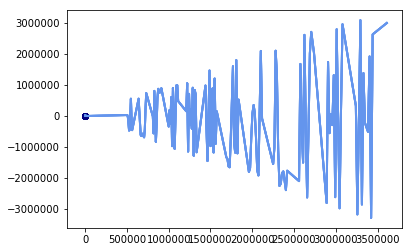

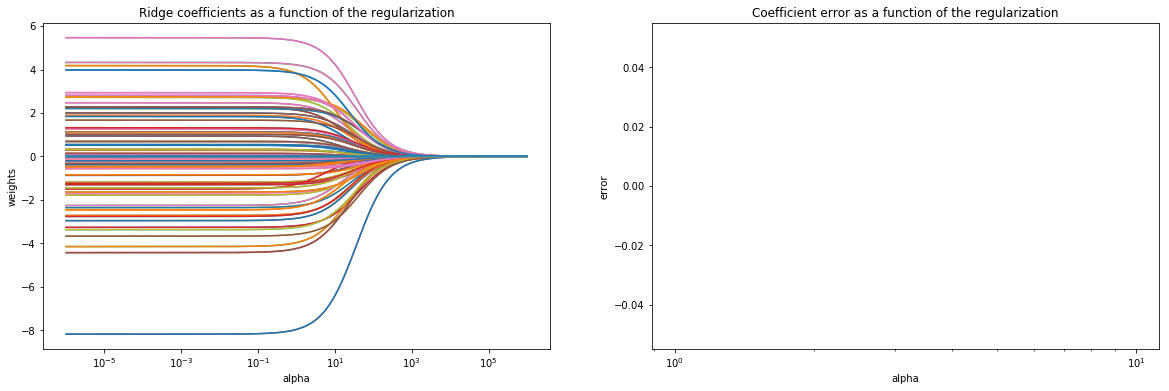

In [119]:

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

#w = make_regression(n_samples=10506, n_features=2211, coef=True,
#                           random_state=1, bias=3.5)

coefs = []
#errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, Y)
    coefs.append(clf.coef_)
    #errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
#ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [127]:
print("Regression Coefficients: \n"), reg.coef_

Regression Coefficients: 



(None, array([  5.63645172e-12,  -1.14373951e-01,  -4.43179451e-01, ...,
          3.13783310e-01,  -3.75814609e-04,   4.25149958e-06]))

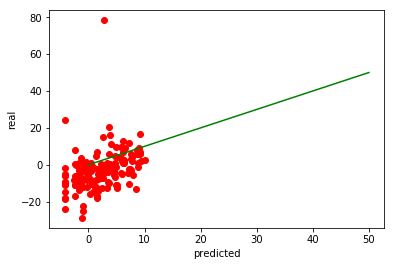

In [136]:
%matplotlib inline
plt.plot(prediction, Y_test,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.savefig('ridge_model.png')
plt.show()

<function matplotlib.pyplot.show>

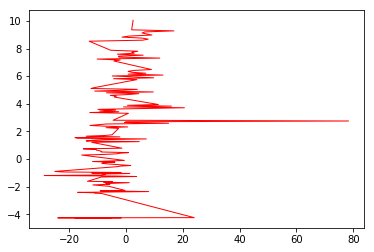

In [133]:
#plt.scatter(X_test, Y_test, color='black')
#plt.scatter(Y_test, reg.predict(X_test))
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=1)
plt.show